# **Image Classification using Mobilenet**

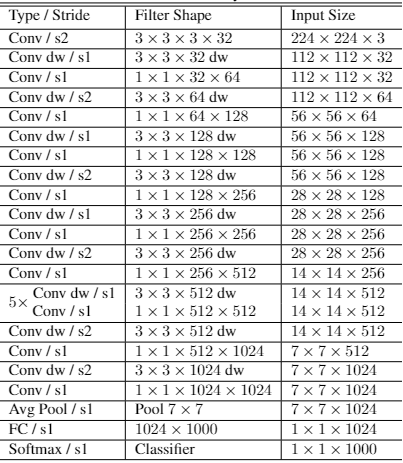

## **Mobilenet Body Architecture**

Reference of the figure:https://www.researchgate.net/publication/316184205_MobileNets_Efficient_Convolutional_Neural_Networks_for_Mobile_Vision_Applications

**Mounting with Google drive**

In [1]:
# Mounting Google Colaboratory with Google Drive where the data set has been uploaded
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Importing Necessary Libraries**

In [2]:
import os
import shutil
import random
import itertools
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib as mpl
from keras import backend
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import decode_predictions, preprocess_input

**Loading dataset devided into Train, Valid and Test**

In [3]:
# Loading data and preprocessing images according to mobilenet requirements
# Creating batches of data

labels = ['Parasitized', 'Uninfected']
train_path = '/content/gdrive/MyDrive/Malaria_Dataset/cell_images/train'
valid_path = '/content/gdrive/MyDrive/Malaria_Dataset/cell_images/valid'
test_path = '/content/gdrive/MyDrive/Malaria_Dataset/cell_images/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 560 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


**Including Mobilenet Model**

In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet(weights='imagenet', include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


**Defining which layers will be trained**

In [5]:
x = mobile.layers[-10].output
x

<KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'conv_dw_12_relu')>

**Implementing Pooling, Regularization, Dense layer and Activation function**

In [6]:
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.00001)(x)  # Regularize with dropout
output = Dense(units=2, activation='sigmoid')(x)

**Defining the model**

In [7]:
model = Model(inputs=mobile.input, outputs=output)
for layer in model.layers[:-21]:
    layer.trainable = False

**The Mobilenet Model**

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                      

**Compiling the model**

In [9]:
model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

**Model Fitting**

In [10]:
history = model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=25,
          verbose=2
)

Epoch 1/25
56/56 - 121s - loss: 0.1875 - accuracy: 0.9250 - val_loss: 0.9061 - val_accuracy: 0.6500 - 121s/epoch - 2s/step
Epoch 2/25
56/56 - 2s - loss: 0.0451 - accuracy: 0.9768 - val_loss: 1.4537 - val_accuracy: 0.5125 - 2s/epoch - 43ms/step
Epoch 3/25
56/56 - 3s - loss: 0.0208 - accuracy: 0.9964 - val_loss: 1.9894 - val_accuracy: 0.5063 - 3s/epoch - 57ms/step
Epoch 4/25
56/56 - 2s - loss: 0.0606 - accuracy: 0.9821 - val_loss: 1.3546 - val_accuracy: 0.6562 - 2s/epoch - 43ms/step
Epoch 5/25
56/56 - 2s - loss: 0.0717 - accuracy: 0.9750 - val_loss: 5.2953 - val_accuracy: 0.5000 - 2s/epoch - 41ms/step
Epoch 6/25
56/56 - 2s - loss: 0.0931 - accuracy: 0.9625 - val_loss: 5.4987 - val_accuracy: 0.5000 - 2s/epoch - 45ms/step
Epoch 7/25
56/56 - 3s - loss: 0.0204 - accuracy: 0.9929 - val_loss: 0.7765 - val_accuracy: 0.7625 - 3s/epoch - 49ms/step
Epoch 8/25
56/56 - 3s - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.5360 - val_accuracy: 0.5750 - 3s/epoch - 55ms/step
Epoch 9/25
56/56 - 2s - loss: 

**Saving the model for later use**

In [11]:
model.save("fine_tuned_cell_detection_model")

**Defining labels**

In [12]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
precision = precision_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
f1_score = f1_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
accuracy = accuracy_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Showing Precision, F1 Score and Accuracy**

In [13]:
print('Precision: ', precision)
print('F1 Score: ', f1_score)
print('Accuracy: ', accuracy)

Precision:  1.0
F1 Score:  0.8235294117647058
Accuracy:  0.85


**Plotting Confusion Matrix**

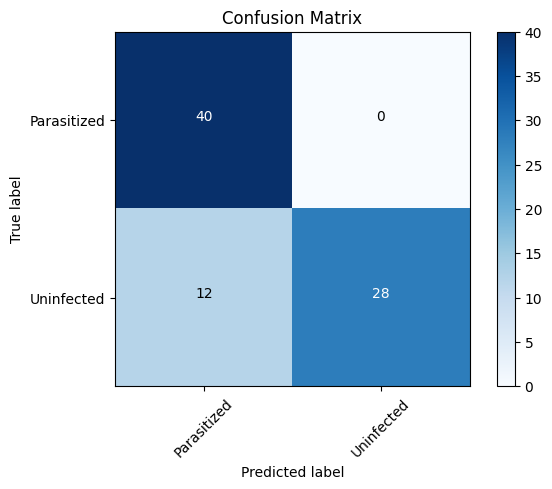

In [14]:
test_batches.class_indices
cm_plot_labels = ['Parasitized','Uninfected']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

**Preprocessing Images**

In [15]:
def preprocess_image(file):
    img_path = '/content/gdrive/MyDrive/Malaria_Dataset/cell_images/test/Parasitized/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

**Showing the image that we want to test**

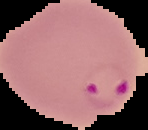

In [16]:
from IPython.display import Image
Image(filename='/content/gdrive/MyDrive/Malaria_Dataset/cell_images/test/Parasitized/emon.png', width=300,height=200) 

**Loading the image for prediction**

In [17]:
preprocessed_image = preprocess_image('emon.png')
predictions = model.predict(preprocessed_image)

1/1 [==============================] - 1s 597ms/step


**Predicting the image**

In [20]:
predictions

array([[9.682594e-01, 9.471772e-04]], dtype=float32)

In [21]:
result = np.argmax(predictions)

**Predicted result**

In [22]:
labels[result]

'Parasitized'

**Plotting Accuracy and Loss graph on Training and Validation Data**

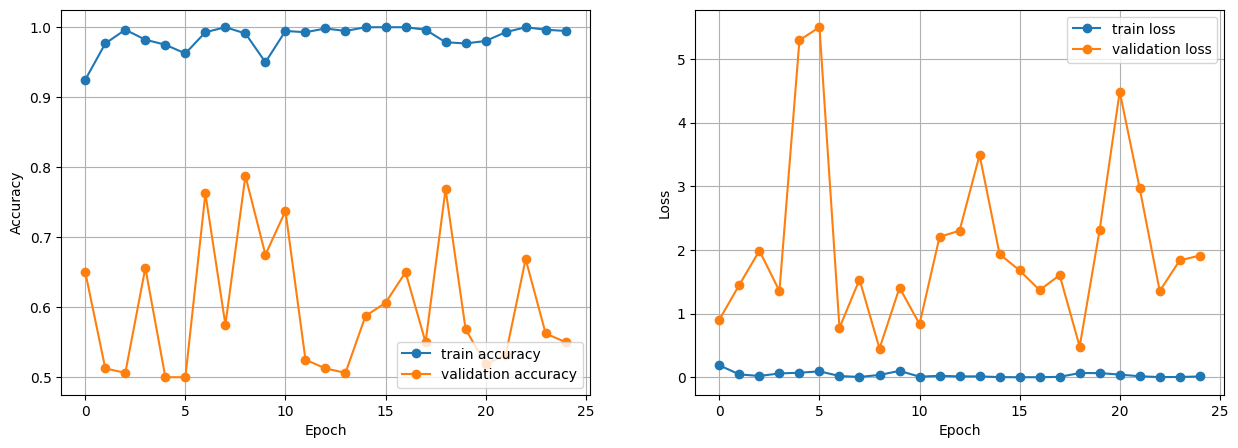

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], 'o-', label='train loss')
plt.plot(history.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

This model can be tuned even more to increase it's accuracy level. This repository (https://github.com/debajyotikarmaker/cvpr_4234) helped in making this image classification model.